In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [2]:
data = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
numeric_data = data.select_dtypes('int64')
numeric_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [4]:
categorical = data.select_dtypes(include=[object])


In [5]:
columns_to_encode = ['region', 'response','employment_status','gender','location_code', 'marital_status','sales_channel','policy_type']

In [6]:
columns_coded = pd.get_dummies(categorical, columns = columns_to_encode, drop_first = True)
columns_coded

,coverage,education,effective_to_date,month,policy,renew_offer_type,vehicle_class,vehicle_size,region_east,region_north west,...,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,sales_channel_branch,sales_channel_call center,sales_channel_web,policy_type_personal auto,policy_type_special auto
0,basic,college,2/18/11,feb,corporate l3,offer3,four-door car,medsize,0,0,...,1,1,0,1,0,0,0,0,0,0
1,basic,college,1/18/11,jan,personal l3,offer4,four-door car,medsize,0,0,...,0,1,0,0,1,0,1,0,1,0
2,basic,bachelor,2/10/11,feb,personal l3,offer3,suv,medsize,1,0,...,1,1,0,0,1,0,1,0,1,0
3,extended,college,1/11/11,jan,corporate l3,offer2,four-door car,medsize,0,1,...,1,1,0,0,1,1,0,0,0,0
4,premium,bachelor,1/17/11,jan,personal l2,offer1,four-door car,medsize,0,1,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,jan,personal l1,offer3,luxury car,medsize,0,0,...,0,1,0,1,0,0,0,1,1,0
10685,basic,college,1/6/11,jan,personal l3,offer2,four-door car,medsize,0,1,...,0,0,1,1,0,1,0,0,1,0
10686,extended,bachelor,2/6/11,feb,corporate l3,offer1,luxury suv,medsize,0,0,...,0,0,0,1,0,0,0,1,0,0
10687,premium,college,2/13/11,feb,personal l1,offer1,suv,medsize,0,0,...,0,0,1,0,0,1,0,0,1,0


Now the ordinal columns... 
we start with education: 

In [7]:
le = LabelEncoder()
le.fit(["high school or below", "college", "bachelor", "master", "doctor"])
categorical['education'] = le.transform(categorical['education'])


In [8]:
categorical['education']

0        1
1        1
2        0
3        1
4        0
        ..
10684    0
10685    1
10686    0
10687    1
10688    0
Name: education, Length: 10689, dtype: int64

In [10]:
categorical.head(10)


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,1,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,1,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,0,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,1,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,0,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
5,west region,yes,basic,3,2/14/11,feb,employed,m,suburban,divorced,personal auto,personal l3,offer1,agent,four-door car,medsize
6,west region,no,basic,2,2/14/11,feb,employed,f,urban,married,corporate auto,corporate l2,offer2,branch,four-door car,medsize
7,west region,no,basic,3,2/24/11,feb,employed,m,urban,single,personal auto,personal l2,offer2,branch,two-door car,medsize
8,west region,yes,premium,1,1/19/11,jan,employed,m,suburban,single,personal auto,personal l1,offer2,branch,sports car,medsize
9,north west,no,extended,4,1/4/11,jan,employed,f,suburban,married,corporate auto,corporate l3,offer2,agent,four-door car,small


In [ ]:
# Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.
# 
# -varA
# Use minmax transform to bring varA's values into the range [0,1].
# Check that varA has been rescaled using a displot or a histogram
# 

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

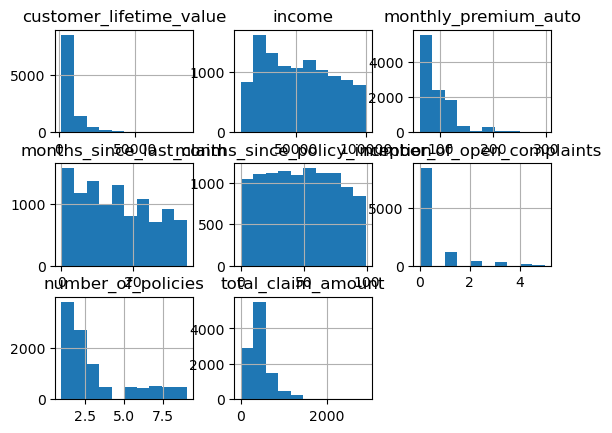

In [12]:

numeric_data.hist()


In [13]:

scaler = MinMaxScaler()


In [14]:
numeric_data['income'] = scaler.fit_transform(numeric_data[['income']])


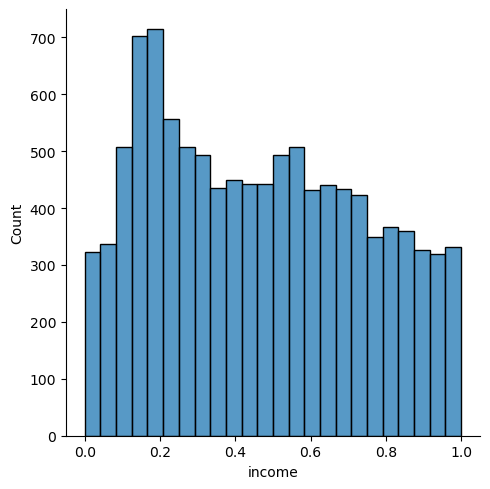

In [16]:
sns.displot(numeric_data.income)